In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..', 'scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# %matplotlib notebook
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
import numpy as np

In [5]:
from pointcloud_db import ConePositionTable, PointCloudTable
from pointcloud_db import get_run_progressive_bounding_boxes

In [30]:
pos_table = ConePositionTable()
pc_table = PointCloudTable()

cone_positions = pos_table.read_rows()

bbxs = [pc_table.bounding_box(cone_position, .2) for cone_position in cone_positions]

In [31]:
bb_selection = widgets.BoundedIntText(
    value=None,
    min=0,
    max=len(bbxs)-1,
    step=1,
    description='Bounding Box:',
    disabled=False
)
display(bb_selection)

BoundedIntText(value=0, description='Bounding Box:', max=111)

In [32]:
BB = 100

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
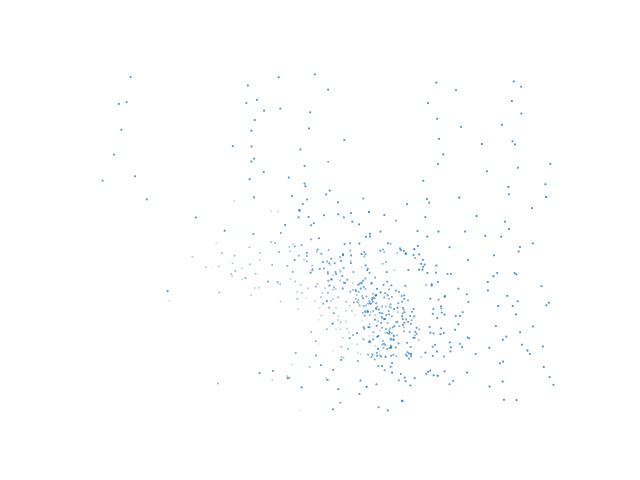

In [33]:
points = bbxs[BB]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([p[0] for p in points], [p[1] for p in points], [p[2] for p in points])
ax.set_axis_off()
plt.show()

In [34]:
points = bbxs[BB]

x = [p[0] for p in points]
y = [p[1] for p in points]
z = [p[2] for p in points]

x_mean = np.mean(x)
y_mean = np.mean(y)
z_mean = np.mean(z)

x = [xi - x_mean for xi in x]
y = [yi - y_mean for yi in y]
z = [zi - z_mean for zi in z]

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
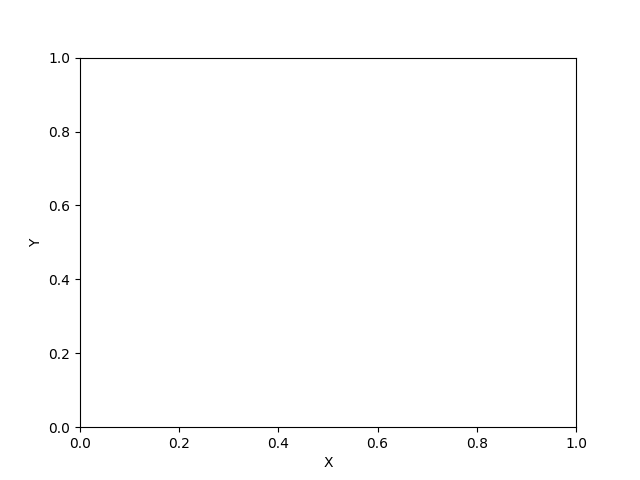

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()


ax = plt.axes(projection='3d')
fig.show()

NUM_PTS_MAX = 200
ax.scatter3D(x[:NUM_PTS_MAX], y[:NUM_PTS_MAX], z[:NUM_PTS_MAX])


In [7]:
get_run_progressive_bounding_boxes()

OperationalError: near "13": syntax error